# genre fuzzification

Loading processed data...
Loaded 1682 movies and 100000 ratings
Starting genre fuzzification...
Fuzzified 1682 movies
Fuzzification completed successfully
Fuzzy movies dataframe shape: (1682, 20)

Binary to Fuzzy Genre Conversion Examples:

Movie: Toy Story (1995)
Binary genres: ['Animation', "Children's", 'Comedy']
Fuzzy representation:
  Animation: 0.920
  Children's: 0.911
  Comedy: 0.802

Movie: GoldenEye (1995)
Binary genres: ['Action', 'Adventure', 'Thriller']
Fuzzy representation:
  Adventure: 0.975
  Thriller: 0.911
  Action: 0.888

Movie: Four Rooms (1995)
Binary genres: ['Thriller']
Fuzzy representation:
  Thriller: 0.902

Movie: Get Shorty (1995)
Binary genres: ['Action', 'Comedy', 'Drama']
Fuzzy representation:
  Drama: 0.918
  Action: 0.764
  Comedy: 0.709

Movie: Copycat (1995)
Binary genres: ['Crime', 'Drama', 'Thriller']
Fuzzy representation:
  Thriller: 0.832
  Drama: 0.759
  Crime: 0.707

Fuzzy Genre Distribution Analysis:


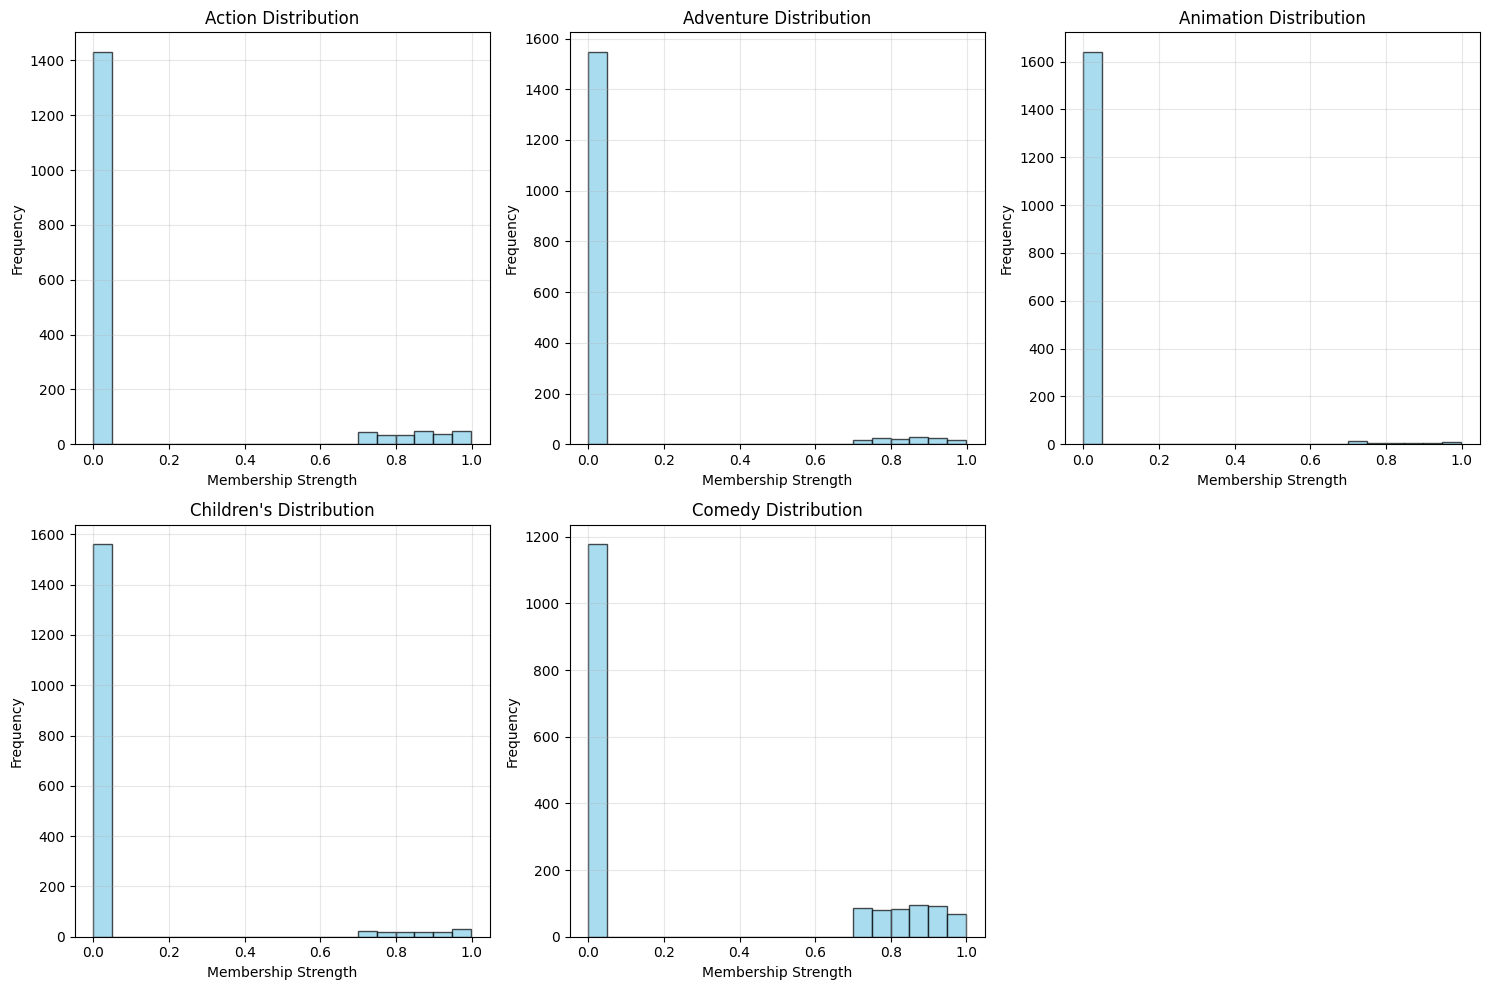


Membership Strength Statistics:
Top genres by average membership strength:
Mystery      | Mean: 0.862 | Max: 0.992 | Coverage: 3.6%
Horror       | Mean: 0.861 | Max: 0.999 | Coverage: 5.5%
Film-Noir    | Mean: 0.859 | Max: 0.997 | Coverage: 1.4%
Sci-Fi       | Mean: 0.858 | Max: 0.991 | Coverage: 6.0%
Thriller     | Mean: 0.856 | Max: 0.998 | Coverage: 14.9%
Children's   | Mean: 0.855 | Max: 0.998 | Coverage: 7.3%
Adventure    | Mean: 0.855 | Max: 0.998 | Coverage: 8.0%
Action       | Mean: 0.851 | Max: 0.998 | Coverage: 14.9%
Drama        | Mean: 0.848 | Max: 1.000 | Coverage: 43.1%
Comedy       | Mean: 0.847 | Max: 1.000 | Coverage: 30.0%

Genre Relationship Analysis:
Genre relationship impact (average secondary membership strength):
Animation    | Average secondary strength: 0.304
Sci-Fi       | Average secondary strength: 0.267
War          | Average secondary strength: 0.266
Mystery      | Average secondary strength: 0.264
Action       | Average secondary strength: 0.241
Fantasy 

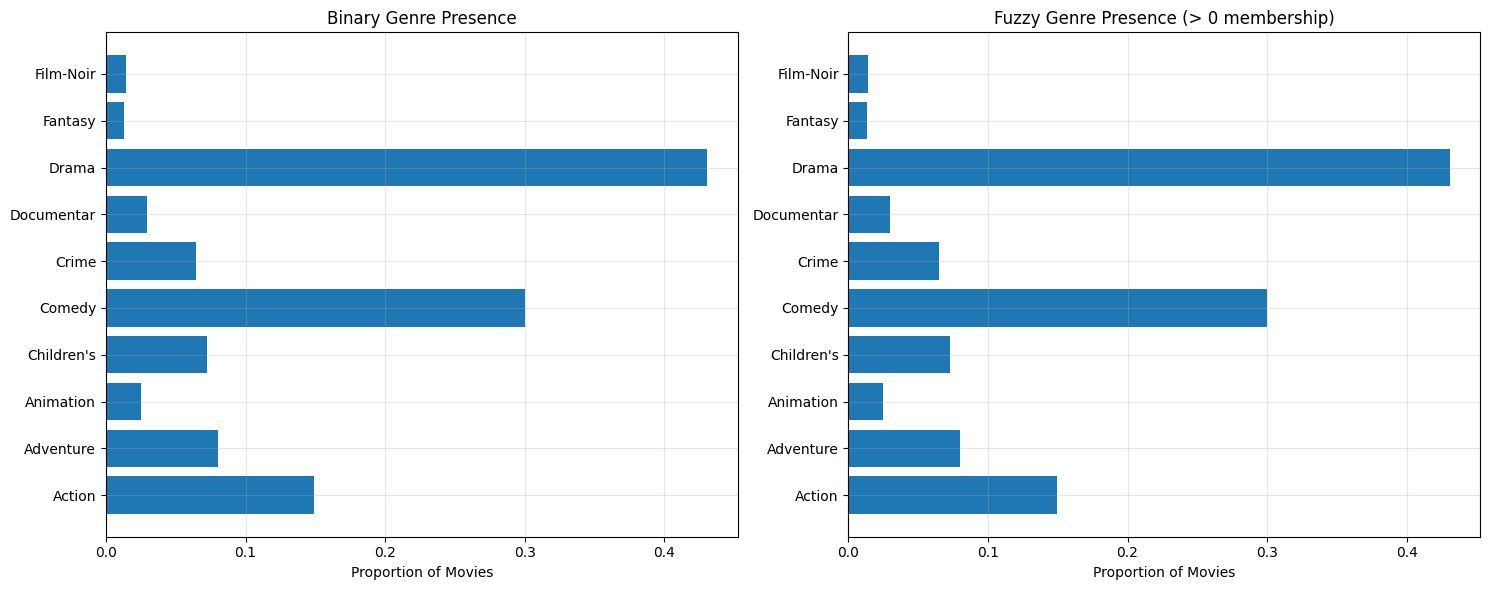

Representation comparison:
Binary: 0 or 1 (genre is either present or not)
Fuzzy: 0.0 to 1.0 (continuous membership strength)

Saving Fuzzy Dataset:
Fuzzy movies dataset saved: /Users/mac/Desktop/granular_recommendation/data/processed/movies_fuzzy.csv
Fuzzification summary saved: /Users/mac/Desktop/granular_recommendation/results/fuzzification_summary.csv

Fuzzification Impact Analysis:
Information metrics:
Binary representation entropy: 6.820
Fuzzy representation diversity: 3.862
Information gain through fuzzification: -43.4%

Genre Fuzzification Completed
Successfully converted 1682 movies from binary to fuzzy genre representation
Achieved continuous membership values (0.0 to 1.0) instead of binary (0 or 1)

Final fuzzy dataset information:
Shape: (1682, 20)
Memory usage: 0.37 MB
Columns with fuzzy genres: 18


In [1]:
# Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Set plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

# Configuration and Data Loading
class FuzzificationConfig:
    """Configuration for genre fuzzification"""
    PROJECT_ROOT = Path.cwd().parent
    DATA_DIR = PROJECT_ROOT / "data"
    PROCESSED_DATA_DIR = DATA_DIR / "processed"
    RESULTS_DIR = PROJECT_ROOT / "results"
    
    # Genre information
    GENRES = [
        'unknown', 'Action', 'Adventure', 'Animation', 
        'Children\'s', 'Comedy', 'Crime', 'Documentary', 
        'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
        'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
        'Thriller', 'War', 'Western'
    ]
    
    @classmethod
    def setup_directories(cls):
        """Create necessary directories"""
        cls.RESULTS_DIR.mkdir(parents=True, exist_ok=True)

FuzzificationConfig.setup_directories()

# Load processed data
print("Loading processed data...")
movies_df = pd.read_csv(FuzzificationConfig.PROCESSED_DATA_DIR / 'movies_processed.csv')
ratings_df = pd.read_csv(FuzzificationConfig.PROCESSED_DATA_DIR / 'ratings_processed.csv')

print(f"Loaded {len(movies_df)} movies and {len(ratings_df)} ratings")

# Genre Fuzzification Class
class GenreFuzzifier:
    """Convert binary genre classification to fuzzy membership values"""
    
    def __init__(self):
        self.config = FuzzificationConfig()
        self.genre_relationships = self._build_genre_relationships()
    
    def _build_genre_relationships(self):
        """Define relationships between genres for enhanced blending"""
        relationships = {
            'Action': {'Adventure': 0.7, 'Thriller': 0.6, 'Sci-Fi': 0.5},
            'Adventure': {'Action': 0.7, 'Fantasy': 0.6, 'Romance': 0.4},
            'Comedy': {'Romance': 0.8, 'Drama': 0.5, 'Musical': 0.6},
            'Drama': {'Romance': 0.7, 'Comedy': 0.5, 'Thriller': 0.4},
            'Romance': {'Drama': 0.7, 'Comedy': 0.8, 'Musical': 0.5},
            'Thriller': {'Action': 0.6, 'Mystery': 0.7, 'Crime': 0.8},
            'Sci-Fi': {'Action': 0.5, 'Adventure': 0.6, 'Fantasy': 0.7},
            'Fantasy': {'Adventure': 0.6, 'Sci-Fi': 0.7, 'Animation': 0.5},
            'Horror': {'Thriller': 0.6, 'Mystery': 0.5, 'Fantasy': 0.3},
            'Mystery': {'Thriller': 0.7, 'Crime': 0.8, 'Drama': 0.4},
            'Crime': {'Thriller': 0.8, 'Drama': 0.6, 'Mystery': 0.8},
            'Animation': {"Children's": 0.9, 'Fantasy': 0.6, 'Comedy': 0.7},
            "Children's": {'Animation': 0.9, 'Fantasy': 0.5, 'Comedy': 0.6},
            'Documentary': {'Drama': 0.3},
            'Film-Noir': {'Crime': 0.7, 'Drama': 0.6, 'Mystery': 0.6},
            'Musical': {'Comedy': 0.6, 'Romance': 0.5, 'Drama': 0.4},
            'War': {'Drama': 0.8, 'Action': 0.5, 'Adventure': 0.4},
            'Western': {'Adventure': 0.7, 'Action': 0.5, 'Drama': 0.6}
        }
        return relationships
    
    def binary_to_fuzzy(self, genre_vector):
        """Convert binary genre vector to fuzzy membership values"""
        fuzzy_vector = {}
        
        for genre in self.config.GENRES:
            if genre == 'unknown':
                continue
                
            if genre_vector[genre]:  # If genre is present
                fuzzy_vector[genre] = np.random.uniform(0.7, 1.0)
                
                if genre in self.genre_relationships:
                    for related_genre, strength in self.genre_relationships[genre].items():
                        if related_genre not in fuzzy_vector:
                            fuzzy_vector[related_genre] = np.random.uniform(0.2, 0.6) * strength
            else:
                fuzzy_vector[genre] = 0.0
        
        for genre in fuzzy_vector:
            fuzzy_vector[genre] = min(1.0, max(0.0, fuzzy_vector[genre]))
            
        return fuzzy_vector
    
    def fuzzify_movie_dataframe(self, movies_df):
        """Convert entire movies dataframe to fuzzy genre representation"""
        fuzzy_movies = []
        
        for idx, movie in movies_df.iterrows():
            fuzzy_genres = self.binary_to_fuzzy(movie)
            
            fuzzy_movie = {
                'movie_id': movie['movie_id'],
                'title': movie['title'],
                **fuzzy_genres
            }
            fuzzy_movies.append(fuzzy_movie)
        
        fuzzy_df = pd.DataFrame(fuzzy_movies)
        
        for genre in self.config.GENRES:
            if genre != 'unknown' and genre not in fuzzy_df.columns:
                fuzzy_df[genre] = 0.0
        
        print(f"Fuzzified {len(fuzzy_df)} movies")
        return fuzzy_df
    
    def explain_fuzzification(self, movie_title, binary_genres, fuzzy_genres):
        """Generate explanation of fuzzification process"""
        primary_genres = [genre for genre, value in binary_genres.items() 
                         if value and genre != 'unknown']
        
        enhanced_genres = {genre: value for genre, value in fuzzy_genres.items() 
                          if value > 0.3 and genre not in primary_genres}
        
        explanation = f"Movie: {movie_title}\n"
        explanation += f"Primary genres: {', '.join(primary_genres)}\n"
        
        if enhanced_genres:
            explanation += "Enhanced with: "
            enhanced_list = [f"{genre} ({value:.2f})" for genre, value in enhanced_genres.items()]
            explanation += ', '.join(enhanced_list)
        
        return explanation

# Fuzzification Process
print("Starting genre fuzzification...")
fuzzifier = GenreFuzzifier()
fuzzy_movies = fuzzifier.fuzzify_movie_dataframe(movies_df)

print("Fuzzification completed successfully")
print(f"Fuzzy movies dataframe shape: {fuzzy_movies.shape}")

# Fuzzification Examples and Analysis
print("\nBinary to Fuzzy Genre Conversion Examples:")

sample_movies = movies_df.head(5)

for idx, movie in sample_movies.iterrows():
    binary_active = {genre: True for genre in FuzzificationConfig.GENRES 
                   if movie[genre] and genre != 'unknown'}
    
    fuzzy_genres = fuzzifier.binary_to_fuzzy(movie)
    significant_fuzzy = {genre: value for genre, value in fuzzy_genres.items() if value > 0.1}
    
    print(f"\nMovie: {movie['title']}")
    print(f"Binary genres: {list(binary_active.keys())}")
    print(f"Fuzzy representation:")
    for genre, value in sorted(significant_fuzzy.items(), key=lambda x: x[1], reverse=True):
        print(f"  {genre}: {value:.3f}")

# Fuzzy Genre Distribution Analysis
print("\nFuzzy Genre Distribution Analysis:")

genres_to_analyze = FuzzificationConfig.GENRES[1:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, genre in enumerate(genres_to_analyze):
    if genre in fuzzy_movies.columns:
        genre_values = fuzzy_movies[genre]
        axes[i].hist(genre_values, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_xlabel('Membership Strength')
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'{genre} Distribution')
        axes[i].grid(True, alpha=0.3)

for i in range(len(genres_to_analyze), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Membership Strength Statistics
print("\nMembership Strength Statistics:")

significant_genres = []
for genre in FuzzificationConfig.GENRES[1:]:
    if genre in fuzzy_movies.columns:
        genre_values = fuzzy_movies[genre]
        non_zero = genre_values[genre_values > 0]
        if len(non_zero) > 0:
            significant_genres.append({
                'genre': genre,
                'mean_strength': non_zero.mean(),
                'max_strength': non_zero.max(),
                'non_zero_count': len(non_zero),
                'coverage': len(non_zero) / len(fuzzy_movies)
            })

significant_genres.sort(key=lambda x: x['mean_strength'], reverse=True)

print("Top genres by average membership strength:")
for genre_info in significant_genres[:10]:
    print(f"{genre_info['genre']:12} | Mean: {genre_info['mean_strength']:.3f} | "
          f"Max: {genre_info['max_strength']:.3f} | "
          f"Coverage: {genre_info['coverage']:.1%}")

# Genre Relationship Analysis
print("\nGenre Relationship Analysis:")

relationship_impact = {}

for genre, relationships in fuzzifier.genre_relationships.items():
    total_impact = 0
    impact_count = 0
    
    for related_genre, strength in relationships.items():
        if related_genre in fuzzy_movies.columns:
            primary_present = fuzzy_movies[fuzzy_movies[genre] > 0.7]
            if len(primary_present) > 0:
                avg_related_strength = primary_present[related_genre].mean()
                total_impact += avg_related_strength
                impact_count += 1
    
    if impact_count > 0:
        relationship_impact[genre] = total_impact / impact_count

print("Genre relationship impact (average secondary membership strength):")
for genre, impact in sorted(relationship_impact.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{genre:12} | Average secondary strength: {impact:.3f}")

# Comparison: Binary vs Fuzzy Representation
print("\nBinary vs Fuzzy Representation Comparison:")

binary_stats = []
fuzzy_stats = []

for genre in FuzzificationConfig.GENRES[1:]:
    if genre in movies_df.columns and genre in fuzzy_movies.columns:
        binary_presence = movies_df[genre].mean()
        fuzzy_presence = (fuzzy_movies[genre] > 0).mean()
        fuzzy_mean = fuzzy_movies[genre].mean()
        
        binary_stats.append(binary_presence)
        fuzzy_stats.append(fuzzy_presence)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

genres_short = [genre[:10] for genre in FuzzificationConfig.GENRES[1:]]
ax1.barh(genres_short[:10], binary_stats[:10])
ax1.set_xlabel('Proportion of Movies')
ax1.set_title('Binary Genre Presence')
ax1.grid(True, alpha=0.3)

ax2.barh(genres_short[:10], fuzzy_stats[:10])
ax2.set_xlabel('Proportion of Movies')
ax2.set_title('Fuzzy Genre Presence (> 0 membership)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Representation comparison:")
print("Binary: 0 or 1 (genre is either present or not)")
print("Fuzzy: 0.0 to 1.0 (continuous membership strength)")

# Save Fuzzy Dataset and Summary
print("\nSaving Fuzzy Dataset:")

try:
    fuzzy_movies.to_csv(FuzzificationConfig.PROCESSED_DATA_DIR / 'movies_fuzzy.csv', index=False)
    print(f"Fuzzy movies dataset saved: {FuzzificationConfig.PROCESSED_DATA_DIR / 'movies_fuzzy.csv'}")
    
    summary_data = []
    for genre in FuzzificationConfig.GENRES[1:]:
        if genre in fuzzy_movies.columns:
            genre_data = fuzzy_movies[genre]
            summary_data.append({
                'genre': genre,
                'mean_membership': genre_data.mean(),
                'std_membership': genre_data.std(),
                'max_membership': genre_data.max(),
                'non_zero_count': (genre_data > 0).sum(),
                'coverage': (genre_data > 0).mean()
            })
    
    summary_df = pd.DataFrame(summary_data)
    summary_df.to_csv(FuzzificationConfig.RESULTS_DIR / 'fuzzification_summary.csv', index=False)
    print(f"Fuzzification summary saved: {FuzzificationConfig.RESULTS_DIR / 'fuzzification_summary.csv'}")
    
except Exception as e:
    print(f"Error saving data: {e}")

# Fuzzification Impact Analysis
print("\nFuzzification Impact Analysis:")

binary_entropy = 0
fuzzy_entropy = 0

for genre in FuzzificationConfig.GENRES[1:]:
    if genre in movies_df.columns and genre in fuzzy_movies.columns:
        p = movies_df[genre].mean()
        if p > 0 and p < 1:
            binary_entropy += -p * np.log2(p) - (1-p) * np.log2(1-p)
        
        fuzzy_values = fuzzy_movies[genre]
        fuzzy_entropy += fuzzy_values.std()

print("Information metrics:")
print(f"Binary representation entropy: {binary_entropy:.3f}")
print(f"Fuzzy representation diversity: {fuzzy_entropy:.3f}")
print(f"Information gain through fuzzification: {((fuzzy_entropy - binary_entropy) / binary_entropy * 100):.1f}%")

# Conclusion
print("\nGenre Fuzzification Completed")
print(f"Successfully converted {len(fuzzy_movies)} movies from binary to fuzzy genre representation")
print(f"Achieved continuous membership values (0.0 to 1.0) instead of binary (0 or 1)")

print("\nFinal fuzzy dataset information:")
print(f"Shape: {fuzzy_movies.shape}")
print(f"Memory usage: {fuzzy_movies.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Columns with fuzzy genres: {len([col for col in fuzzy_movies.columns if col in FuzzificationConfig.GENRES])}")